In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
boosted_faces = dr_datasets.get_faces_boosted_best_features()

In [3]:
reload(common)
n = boosted_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(boosted_faces, n)

For n_clusters = 2 average silhouette_score: 0.13769459618770855 time taken: 0.1499614715576172s
For n_clusters = 3 average silhouette_score: 0.1220300080891141 time taken: 0.09596824645996094s
For n_clusters = 4 average silhouette_score: 0.12158647966825097 time taken: 0.12901020050048828s
For n_clusters = 5 average silhouette_score: 0.10706354158614581 time taken: 0.299466609954834s
For n_clusters = 6 average silhouette_score: 0.10303761498720312 time taken: 0.13959383964538574s
For n_clusters = 7 average silhouette_score: 0.0984706063458808 time taken: 0.16383695602416992s
For n_clusters = 8 average silhouette_score: 0.09512238458188027 time taken: 0.1474449634552002s
For n_clusters = 9 average silhouette_score: 0.08904996673253318 time taken: 0.17265582084655762s
For n_clusters = 10 average silhouette_score: 0.0978655438929248 time taken: 0.3752765655517578s
For n_clusters = 11 average silhouette_score: 0.0907772619842705 time taken: 0.12333869934082031s
For n_clusters = 12 average

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


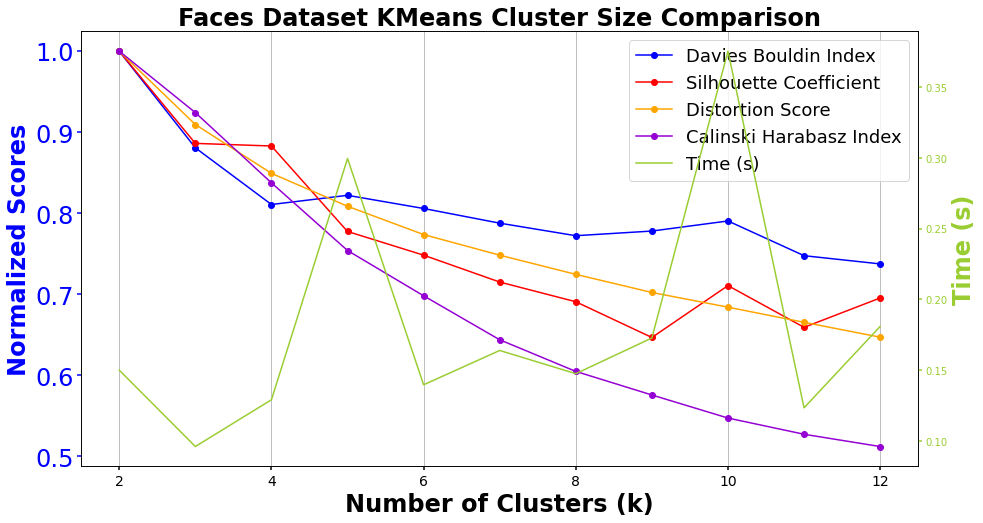

In [4]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


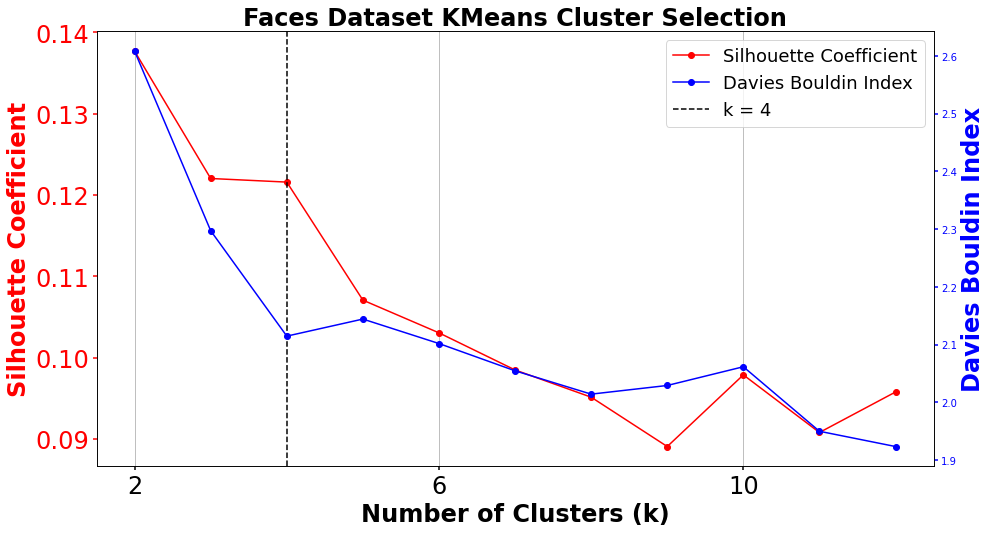

In [5]:
reload(common)
best_k = 4
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 4 average silhouette_score: 0.12158647966825097 time taken: 0.13956928253173828s


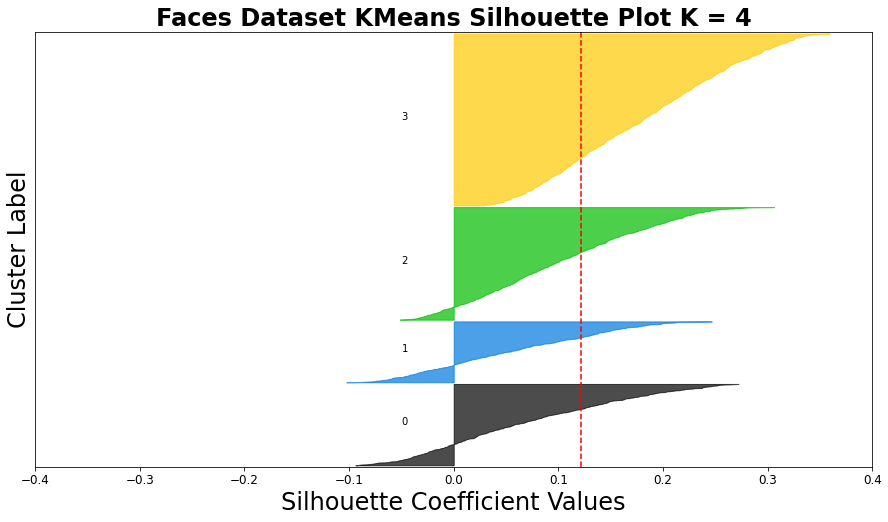

In [7]:
reload(common)
common.plot_silhouette_kmeans(boosted_faces, best_k, DATASET, xlim=[-0.4, 0.4])

In [9]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(boosted_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
Boosted_faces_km = pd.DataFrame(boosted_faces.copy())
Boosted_faces_km['km_labels'] = km.labels_
Boosted_faces_km_vis = Boosted_faces_km.copy()
Boosted_faces_km_vis['sex'] = y_train_faces['sex']
Boosted_faces_km_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))

Time Taken 0.2160351276397705 s
homogeneity_score sex:  0.0006041222987436201
homogeneity_score race:  0.0025328052492441674


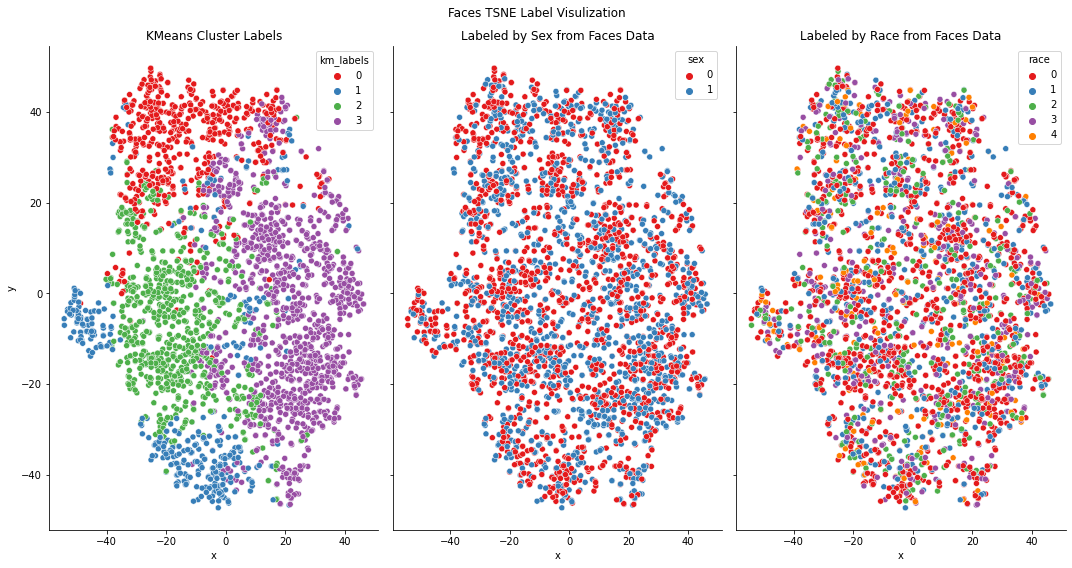

In [11]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(boosted_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

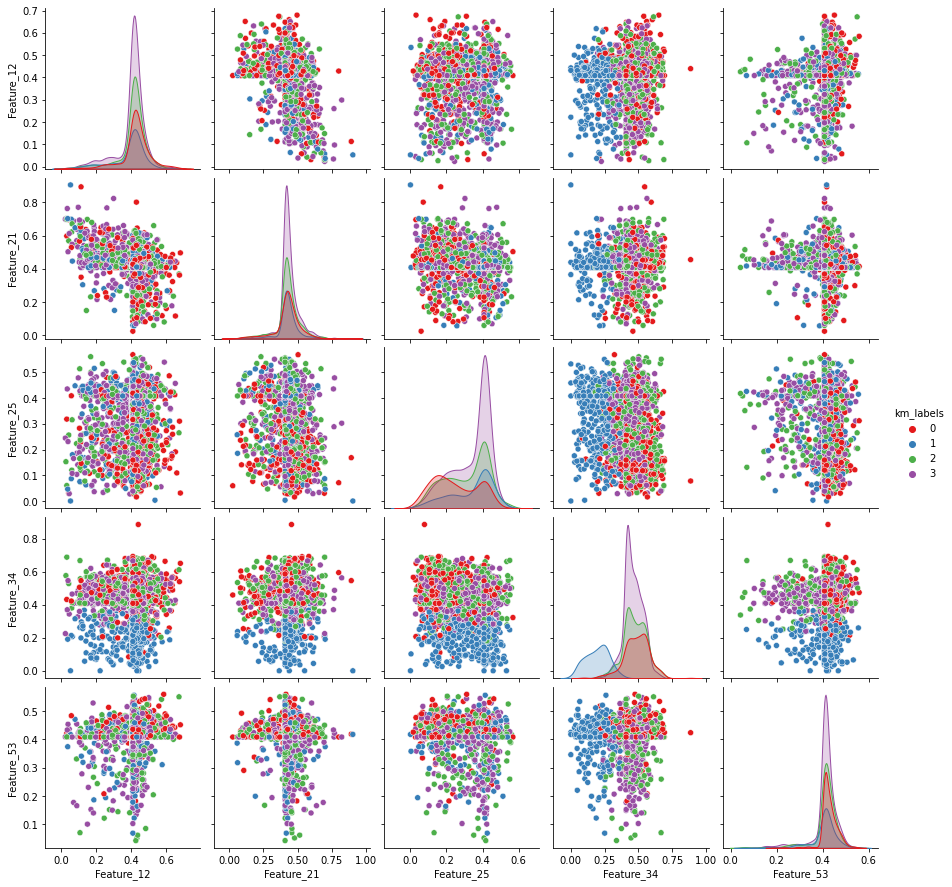

In [17]:
sns.pairplot(Boosted_faces_km[["Feature_12", "Feature_21", "Feature_25", "Feature_34", "Feature_53", "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [18]:
reload(common)
em_n = boosted_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(boosted_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.04533136842816109 time taken: 0.41768312454223633s
For n_clusters = 3 average silhouette_score: -0.005287943774178112 time taken: 0.5167033672332764s


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


For n_clusters = 4 average silhouette_score: -0.053942809221697904 time taken: 1.0347843170166016s
For n_clusters = 5 average silhouette_score: -0.08463347716550527 time taken: 1.0527536869049072s
For n_clusters = 6 average silhouette_score: -0.09407832292348974 time taken: 1.5580618381500244s
For n_clusters = 7 average silhouette_score: -0.09048699686557798 time taken: 1.3257417678833008s
For n_clusters = 8 average silhouette_score: -0.09675699262724405 time taken: 1.4651811122894287s


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


For n_clusters = 9 average silhouette_score: -0.10126775920647156 time taken: 1.844038963317871s
For n_clusters = 10 average silhouette_score: -0.09540124044380796 time taken: 1.1100060939788818s


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


For n_clusters = 11 average silhouette_score: -0.10508039119864021 time taken: 2.3373141288757324s
For n_clusters = 12 average silhouette_score: -0.09846116229107876 time taken: 1.788360834121704s


/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


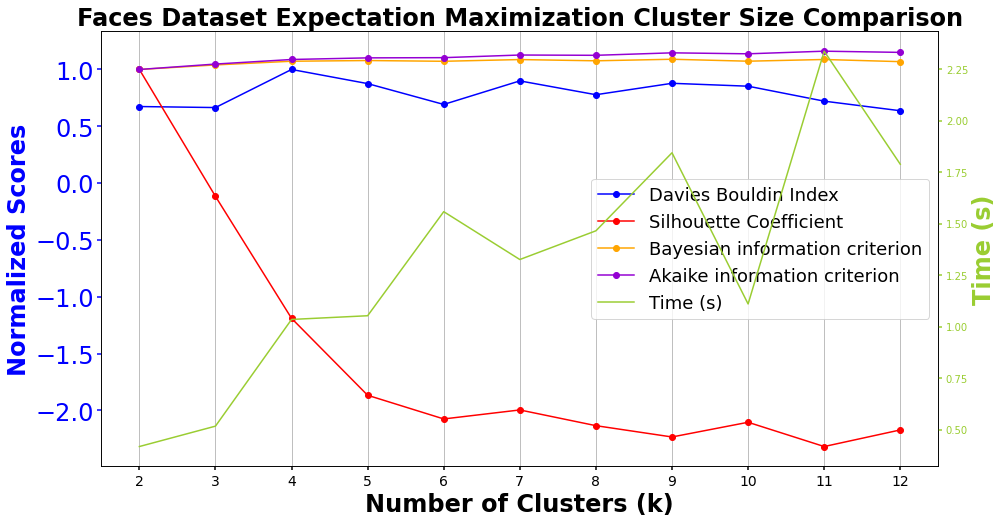

In [19]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


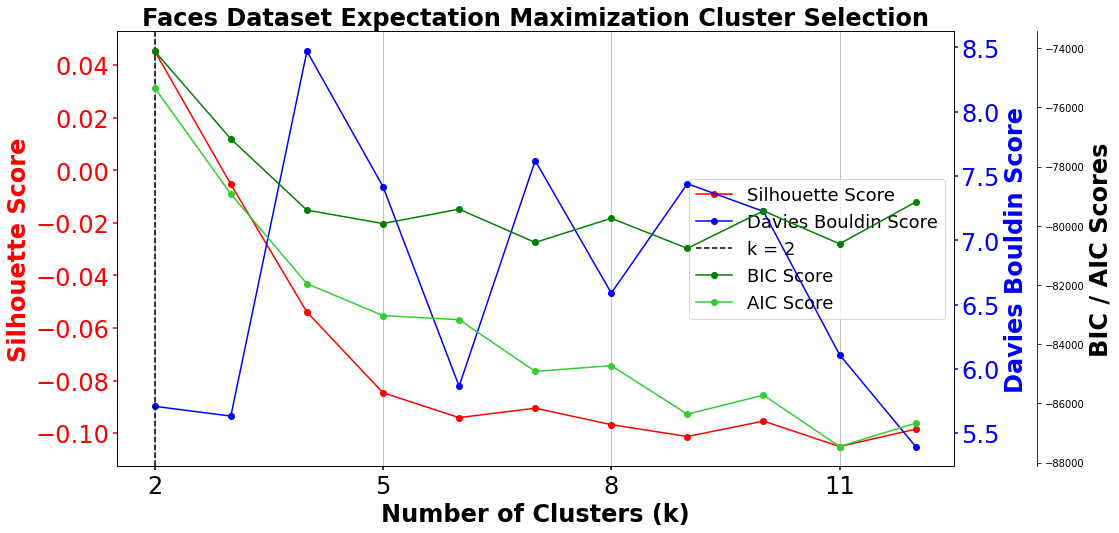

In [21]:
reload(common)
best_k = 2
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 2 average silhouette_score: 0.04533136842816109 time taken: 0.44586992263793945s


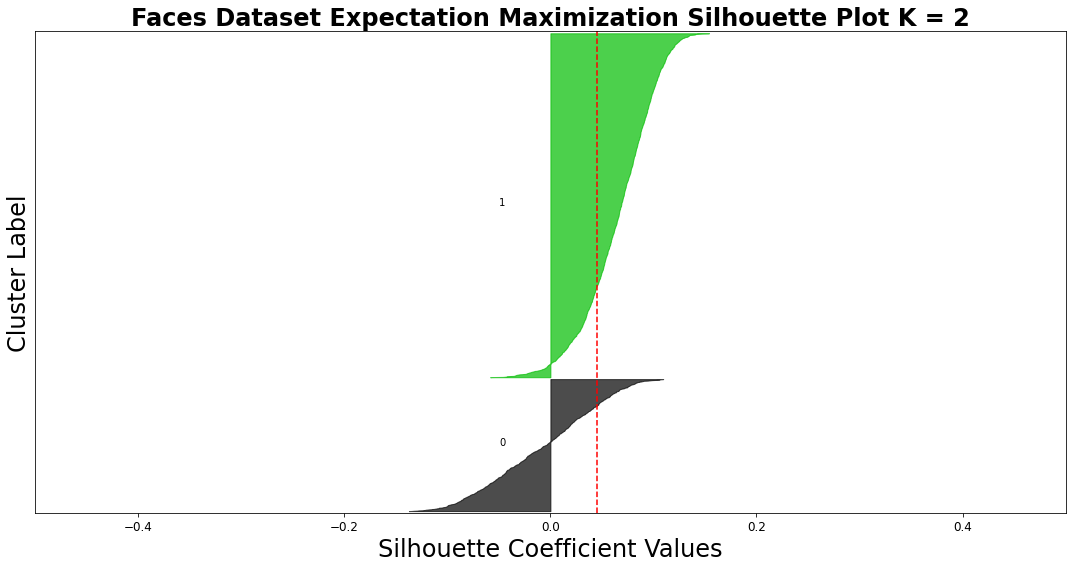

In [23]:
reload(common)
best_k=2
common.plot_silhouette_em(boosted_faces, best_k, DATASET, xlim=[-0.5, 0.5])

In [24]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(boosted_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(boosted_faces)
boosted_faces_gm = pd.DataFrame(boosted_faces.copy())
boosted_faces_gm['em_labels'] = em_model.predict(boosted_faces)

boosted_faces_gm_vis = boosted_faces_gm.copy()
boosted_faces_gm_vis['sex'] = y_train_faces['sex']
boosted_faces_gm_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(boosted_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(boosted_faces), y_train_faces['race']))

time taken 0.5045747756958008 s
homogeneity_score sex:  4.960746603719498e-05
homogeneity_score race:  0.0007890628181611216


In [26]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(boosted_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

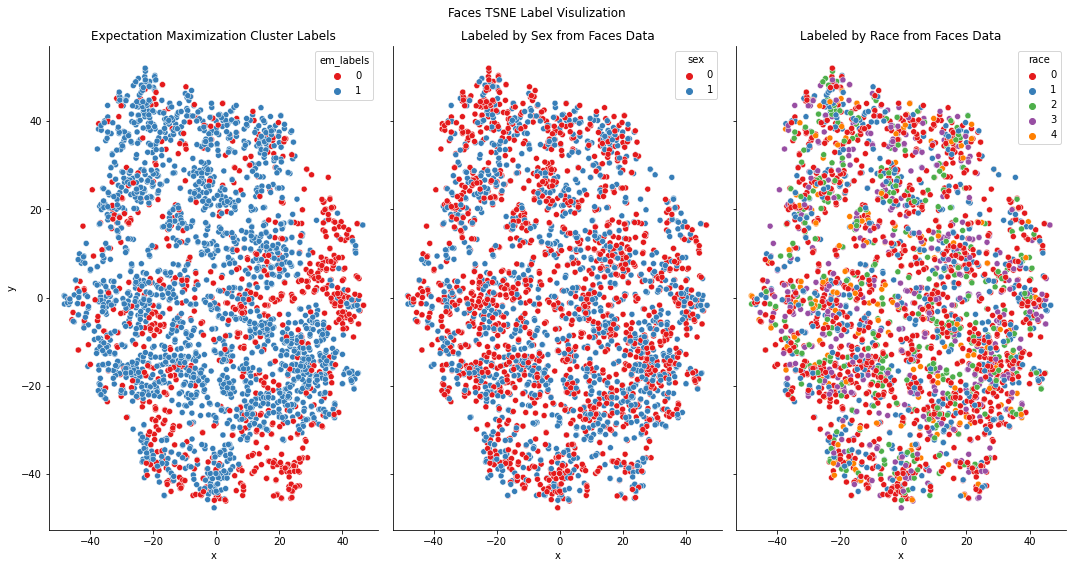

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

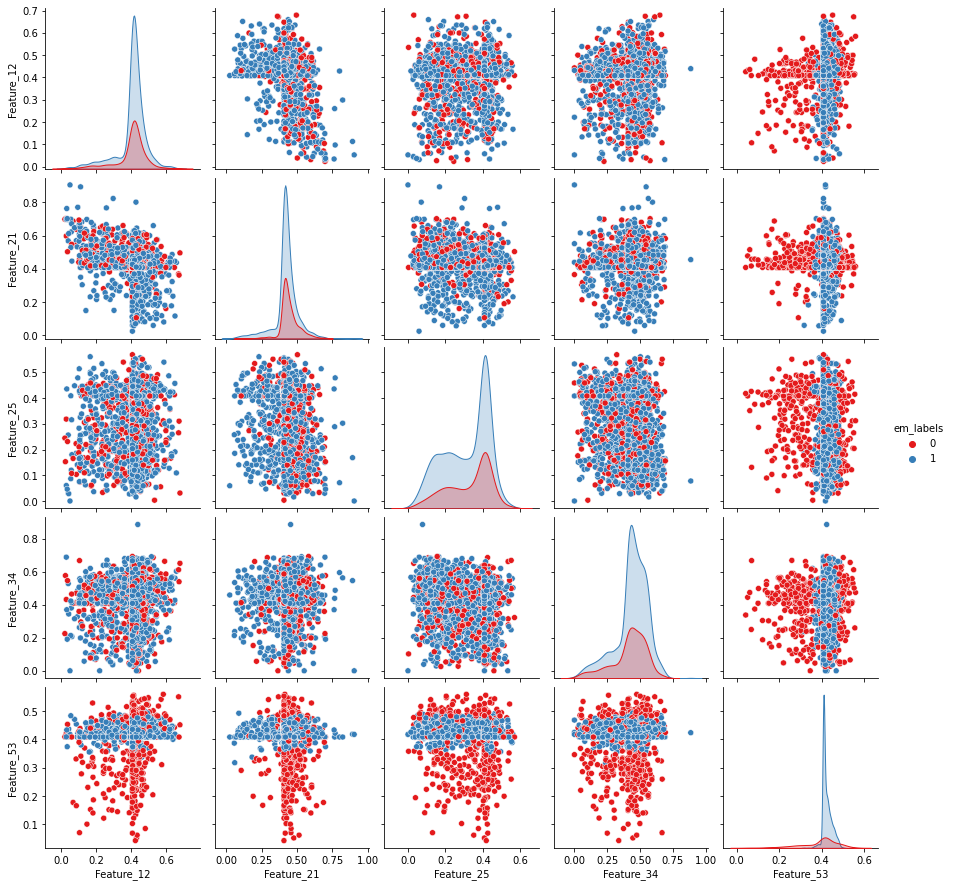

In [30]:
sns.pairplot(boosted_faces_gm[["Feature_12", "Feature_21", "Feature_25", "Feature_34", "Feature_53", "em_labels"]], hue="em_labels", palette="Set1")